In [112]:
import gym
import gym_pomdp
import numpy as np
import pandas as pd
import math, random
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from scores.score_logger import ScoreLogger
env = gym.make('Tiger-v0')

In [133]:
def agent(states, actions):
    model = Sequential()
    model.add(Dense(24, input_shape=(env.observation_space.n,), activation="relu"))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(env.action_space.n, activation="linear"))
    return model
model = agent(env.observation_space.n, env.action_space.n)

In [141]:
memory = SequentialMemory(limit=50000, window_length=3)

In [142]:
dqn = DQNAgent(model, policy= EpsGreedyQPolicy(), test_policy=None, enable_double_dqn=True, enable_dueling_network=True, dueling_type='avg', nb_actions = env.action_space.n, memory=memory)

In [143]:
dqn.compile(optimizer=Adam(lr=0.001))

In [148]:
dqn.fit(env, nb_steps = 100000, visualize = False, verbose = 1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 138s 14ms/step - reward: 1.2542
694 episodes - episode_reward: 18.063 [-24.000, 263.000] - loss: 39.406 - mean_q: 10.643 - state: 0.479

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 162s 16ms/step - reward: 1.3451
700 episodes - episode_reward: 19.147 [-27.000, 223.000] - loss: 39.458 - mean_q: 12.111 - state: 0.535

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 171s 17ms/step - reward: 1.2177
499 episodes - episode_reward: 24.515 [-25.000, 336.000] - loss: 37.604 - mean_q: 13.829 - state: 0.527

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 164s 16ms/step - reward: 1.1965
553 episodes - episode_reward: 21.537 [-25.000, 298.000] - loss: 36.719 - mean_q: 15.257 - state: 0.542

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 180s 18ms/step -

In [149]:
scores = dqn.test(env, nb_episodes = 100, visualize= False)
print('Average score over 100 test games:{}'.format(np.mean(scores.history['episode_reward'])))

Testing for 100 episodes ...
Episode 1: reward: -22.000, steps: 3
Episode 2: reward: 104.000, steps: 64
Episode 3: reward: 181.000, steps: 97
Episode 4: reward: 280.000, steps: 141
Episode 5: reward: 91.000, steps: 55
Episode 6: reward: 158.000, steps: 87
Episode 7: reward: 30.000, steps: 39
Episode 8: reward: 15.000, steps: 21
Episode 9: reward: 163.000, steps: 82
Episode 10: reward: 267.000, steps: 165
Episode 11: reward: 151.000, steps: 83
Episode 12: reward: 167.000, steps: 89
Episode 13: reward: -6.000, steps: 9
Episode 14: reward: -6.000, steps: 9
Episode 15: reward: -22.000, steps: 3
Episode 16: reward: 444.000, steps: 230
Episode 17: reward: -14.000, steps: 17
Episode 18: reward: 571.000, steps: 290
Episode 19: reward: 2.000, steps: 23
Episode 20: reward: 56.000, steps: 35
Episode 21: reward: 313.000, steps: 174
Episode 22: reward: 32.000, steps: 26
Episode 23: reward: 30.000, steps: 28
Episode 24: reward: 204.000, steps: 118
Episode 25: reward: 179.000, steps: 99
Episode 26: r

In [150]:
df=pd.DataFrame.from_dict(scores.history)

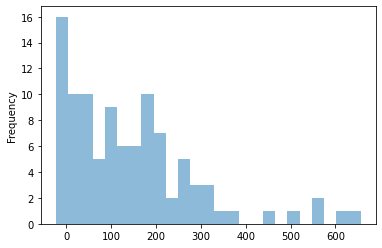

In [151]:
ax = df['episode_reward'].plot.hist(bins=25, alpha=0.5)